In [90]:
import numpy as np

arr = np.array([[[1, 0.2, 3],[6,7,8,]],[[11,12,13],[14,15,16]]])

print(arr)
print("-----")
print(arr[0:2,1:4])
print(arr.dtype)
print("-----")
print(arr.ndim)

[[[ 1.   0.2  3. ]
  [ 6.   7.   8. ]]

 [[11.  12.  13. ]
  [14.  15.  16. ]]]
-----
[[[ 6.  7.  8.]]

 [[14. 15. 16.]]]
float64
-----
3


In [99]:
#access elemnets from array
arr1 = np.array([[1,2,3],[4,5,6]])
print(arr1[1,1])
print(arr1[0,1])

arr2 = np.array([[[1, 2, 3],[6,7,8,]],[[11,12,13],[14,15,16]]])
print(arr2[1,0,0])
print(arr2[0,1,2])

5
2
11
8


In [103]:
#extarcting sub string or more value -->sclising
arr5 = np.array([[1,2,3],[4,5,6]])
print(arr5[1,0:2])
print(arr5[0,1:])

[4 5]
[2 3]


In [113]:
arr = np.array([[[1, 2, 3],[4,5,6]],[[7,8,9],[10,11,12]]])
print(arr[1,0])#789
print(arr[0,1, :2])#45
print(arr[-2,-2,-3:-1])#12 using -ve index
print(arr[-1,-1,-2:])#11,12 using -ve index

[7 8 9]
[4 5]
[1 2]
[11 12]


In [121]:
arr5 = np.array([[1,2,3,4,5],[6,7,8,9,10]])
print(arr5[0:2,1:4])
print(arr5[0:2,1:4])#234 & 789
print(arr5.dtype)

[[2 3 4]
 [7 8 9]]
[[2 3 4]
 [7 8 9]]
int64


In [123]:
fruite = np.array(['banana','grapes','kiwi','apple'])
print(fruite.dtype,fruite)

<U6 ['banana' 'grapes' 'kiwi' 'apple']


In [128]:
arr = np.array([1,2,3,4,5],dtype = 'd')
print(arr,arr.dtype)

[1. 2. 3. 4. 5.] float64


In [129]:
arr = np.array([1.2,2.1,3.1])
newarr = arr.astype('i')
print(newarr)
print(newarr.dtype)

[1 2 3]
int32


In [131]:
#copy array
x = arr.copy()
arr[2] = 100
print("duplicate",x)
print("original",arr)

duplicate [ 1.2 42.   3.1]
original [  1.2  42.  100. ]


In [ ]:
arr = np.array([1,2,3,4,5])
x = arr.view()
arr[2] = 100
print("duplicate",x)
print("original",arr)

In [133]:
arr = np.array([1,2,3,4,5])
x=arr.copy()
y = arr.view()
print("duplicate",x.base)
print("original",y.base)

duplicate None
original [1 2 3 4 5]


In [138]:
arr1 = np.array([1,2,3,4,5,6,7,8])
newarr = arr1.reshape(4,2)
print(newarr)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [140]:
#flattening arrays
arr = np.array([[[1, 2, 3],[4,5,6]],[[7,8,9],[10,11,12]]])
newarr = arr.reshape(-1)
print(newarr)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [146]:
#iterating array
arr = np.array([[1,2,3],[5,6,7]])
for i in arr:
  for j in i:
    print(j)

1
2
3
5
6
7


In [147]:
arr = np.array([[[1, 2, 3],[4,5,6]],[[7,8,9],[10,11,12]]])
for i in arr:
  for j in i:
    for k in j:
      print(k)

1
2
3
4
5
6
7
8
9
10
11
12


In [148]:
arr = np.array([[[1, 2, 3],[4,5,6]],[[7,8,9],[10,11,12]]])
for i in np.nditer(arr):
  print(i)

1
2
3
4
5
6
7
8
9
10
11
12


In [151]:
arr1 = np.array([[1,2],[3,4]])
arr2 = np.array([[5,6],[7,8]])
newarr1 = np.concatenate((arr1,arr2),axis = 1)
newarr2 = np.concatenate((arr1,arr2),axis = 0)
print("column wise",newarr1)
print("row wise",newarr2)

column wise [[1 2 5 6]
 [3 4 7 8]]
row wise [[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [152]:
arr = np.array([41,42,43,44])
filterarr=arr>42
newarr = arr[filterarr]
print(filterarr)
print(newarr)

[False False  True  True]
[43 44]


In [157]:
from numpy import random
x = random.rand()
print(x)

0.8209100445128394


In [161]:
x = random.randint(100,size=(10))
print(x)
print("--------------")
y = random.randint(100,size=(3,5))
print(y)

[47 62 58 97 68 86 54 54 40 14]
--------------
[[25 53 63 44 31]
 [57 11 77 94 59]
 [83 46 34 27 13]]


In [164]:
import mathplotlib.pyplot as plt
import numpy as np
y1 = np.array([3,8,1,10])
y2 = np.array([6,2,7,11])
plt.bar(y1,y2)
plt.show()

ModuleNotFoundError: No module named 'mathplotlib'

In [163]:
pip install matplotlib


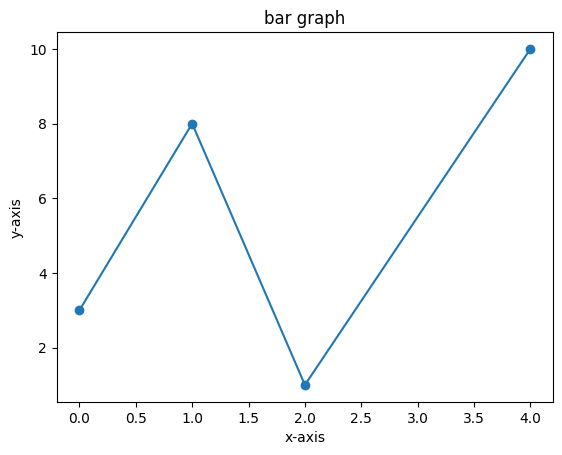

In [170]:
import matplotlib.pyplot as plt
import numpy as np

y1 = np.array([0, 1, 2, 4])
y2 = np.array([3, 8, 1, 10])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("bar graph")
plt.plot(y1, y2,marker='o')
plt.show()


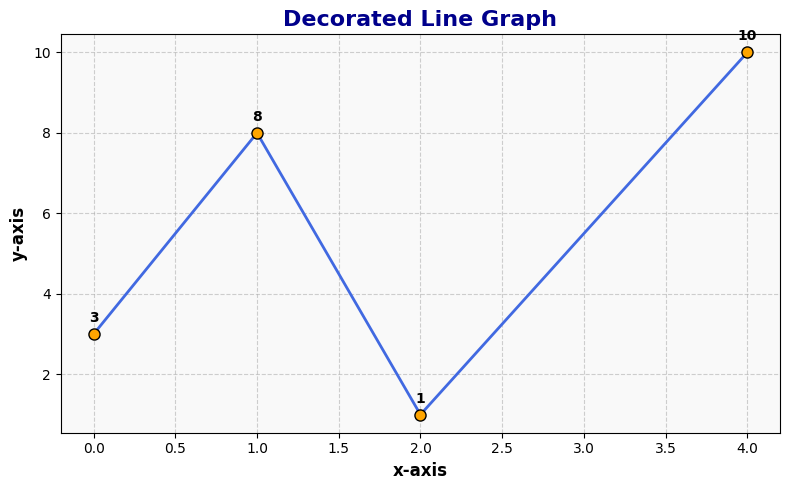

In [172]:
import matplotlib.pyplot as plt
import numpy as np

# Data
y1 = np.array([0, 1, 2, 4])
y2 = np.array([3, 8, 1, 10])

# Create figure
plt.figure(figsize=(8, 5))
plt.plot(y1, y2,
         marker='o',        # circular markers
         color='royalblue', # line color
         linestyle='-',     # solid line
         linewidth=2,       # line thickness
         markersize=8,      # marker size
         markerfacecolor='orange', # fill color of markers
         markeredgecolor='black')  # edge color of markers

# Labels and title
plt.xlabel("x-axis", fontsize=12, fontweight='bold')
plt.ylabel("y-axis", fontsize=12, fontweight='bold')
plt.title("Decorated Line Graph", fontsize=16, fontweight='bold', color='darkblue')

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Add annotations for each data point
for x, y in zip(y1, y2):
    plt.text(x, y + 0.3, f"{y}", ha='center', fontsize=10, fontweight='bold')

# Add light background
plt.gca().set_facecolor('#f9f9f9')

# Tight layout for spacing
plt.tight_layout()

# Show the decorated plot
plt.show()


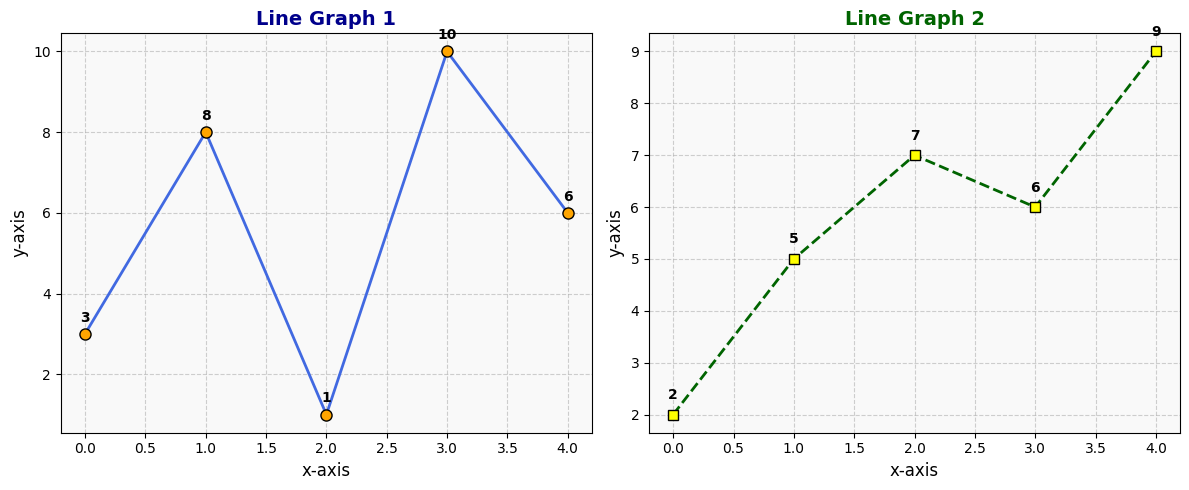

In [174]:
import matplotlib.pyplot as plt
import numpy as np

# Data for first line plot
x1 = np.array([0, 1, 2, 3, 4])
y1 = np.array([3, 8, 1, 10, 6])

# Data for second line plot
x2 = np.array([0, 1, 2, 3, 4])
y2 = np.array([2, 5, 7, 6, 9])

# Create 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Subplot 1: First line graph ---
axes[0].plot(x1, y1,
             marker='o',
             color='royalblue',
             linestyle='-',
             linewidth=2,
             markersize=8,
             markerfacecolor='orange',
             markeredgecolor='black')

axes[0].set_title("Line Graph 1", fontsize=14, fontweight='bold', color='darkblue')
axes[0].set_xlabel("x-axis", fontsize=12)
axes[0].set_ylabel("y-axis", fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].set_facecolor('#f9f9f9')

# Add labels on points
for x, y in zip(x1, y1):
    axes[0].text(x, y + 0.3, f"{y}", ha='center', fontsize=10, fontweight='bold')


# --- Subplot 2: Second line graph ---
axes[1].plot(x2, y2,
             marker='s',            # square markers
             color='darkgreen',
             linestyle='--',
             linewidth=2,
             markersize=7,
             markerfacecolor='yellow',
             markeredgecolor='black')

axes[1].set_title("Line Graph 2", fontsize=14, fontweight='bold', color='darkgreen')
axes[1].set_xlabel("x-axis", fontsize=12)
axes[1].set_ylabel("y-axis", fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_facecolor('#f9f9f9')

# Add labels on points
for x, y in zip(x2, y2):
    axes[1].text(x, y + 0.3, f"{y}", ha='center', fontsize=10, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Show both plots
plt.show()


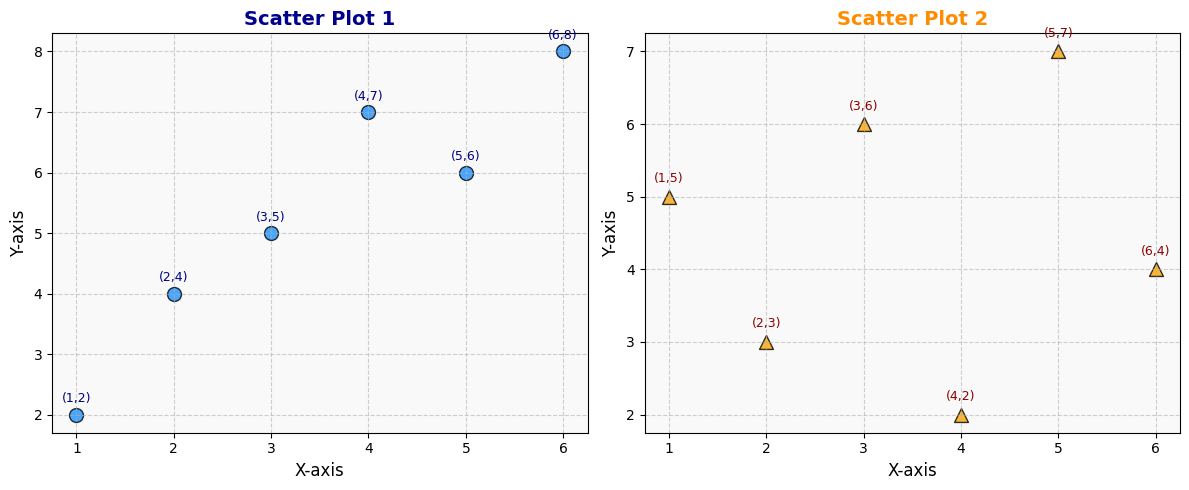

In [175]:
import matplotlib.pyplot as plt
import numpy as np

# Data for first scatter plot
x1 = np.array([1, 2, 3, 4, 5, 6])
y1 = np.array([2, 4, 5, 7, 6, 8])

# Data for second scatter plot
x2 = np.array([1, 2, 3, 4, 5, 6])
y2 = np.array([5, 3, 6, 2, 7, 4])

# Create figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Subplot 1: Scatter Plot 1 ---
axes[0].scatter(x1, y1,
                color='dodgerblue',
                s=100,              # marker size
                edgecolor='black',
                alpha=0.8)

axes[0].set_title("Scatter Plot 1", fontsize=14, fontweight='bold', color='darkblue')
axes[0].set_xlabel("X-axis", fontsize=12)
axes[0].set_ylabel("Y-axis", fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].set_facecolor('#f9f9f9')

# Add labels for each point
for x, y in zip(x1, y1):
    axes[0].text(x, y + 0.2, f"({x},{y})", ha='center', fontsize=9, color='navy')


# --- Subplot 2: Scatter Plot 2 ---
axes[1].scatter(x2, y2,
                color='orange',
                s=100,
                edgecolor='black',
                alpha=0.8,
                marker='^')          # triangle markers

axes[1].set_title("Scatter Plot 2", fontsize=14, fontweight='bold', color='darkorange')
axes[1].set_xlabel("X-axis", fontsize=12)
axes[1].set_ylabel("Y-axis", fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_facecolor('#f9f9f9')

# Add labels for each point
for x, y in zip(x2, y2):
    axes[1].text(x, y + 0.2, f"({x},{y})", ha='center', fontsize=9, color='darkred')

# Adjust layout
plt.tight_layout()
plt.show()
